
## Multivariate Time Series Analysis: Statistical Measures

This notebook illustrates key statistical measures for a multivariate time series with three variables. We will compute the mean vector, covariance matrix, and cross-correlation function.

### Simulated Time Series Data
The data is generated from a multivariate normal distribution with a predefined covariance structure, simulating three interrelated time series.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from scipy.stats import zscore

# Simulate multivariate time series
np.random.seed(42)
n = 200  # number of time points
mean = [0, 0, 0]  # mean vector for the series

# Covariance matrix for 3 interrelated time series
cov = [[1, 0.8, 0.5], 
       [0.8, 1, 0.4], 
       [0.5, 0.4, 1]]

# Generating multivariate time series data
data = multivariate_normal(mean, cov, n)
time = np.arange(n)

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Y1', 'Y2', 'Y3'])
df['time'] = time

# Display the first few rows
df.head()

,Y1,Y2,Y3,time
0,-0.279065,-0.678898,-0.291425,0
1,-1.531777,-1.368941,-0.904750,1
2,-1.459786,-0.996895,-1.634522,2
3,-0.744383,-0.510612,-0.034656,3
4,-1.160114,-0.388871,1.265410,4



### Mean Vector

The mean vector gives the average values for each time series component.


In [2]:
# Mean vector
mean_vector = df[['Y1', 'Y2', 'Y3']].mean()
print("Mean Vector:")
print(mean_vector)

Mean Vector:
Y1   -0.073002
Y2   -0.120167
Y3    0.056289
dtype: float64



### Covariance Matrix

The covariance matrix quantifies the degree to which the variables co-vary.


In [3]:
# Covariance matrix
cov_matrix = df[['Y1', 'Y2', 'Y3']].cov()
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
          Y1        Y2        Y3
Y1  0.838843  0.614269  0.407596
Y2  0.614269  0.809994  0.256549
Y3  0.407596  0.256549  0.923854



### Scatter Plots

Scatter plots visualize the pairwise relationships between different variables in the multivariate time series. They help in identifying the strength and nature of the linear relationships between variables. Below, we plot scatter plots for `Y1`, `Y2`, and `Y3` to observe these relationships.


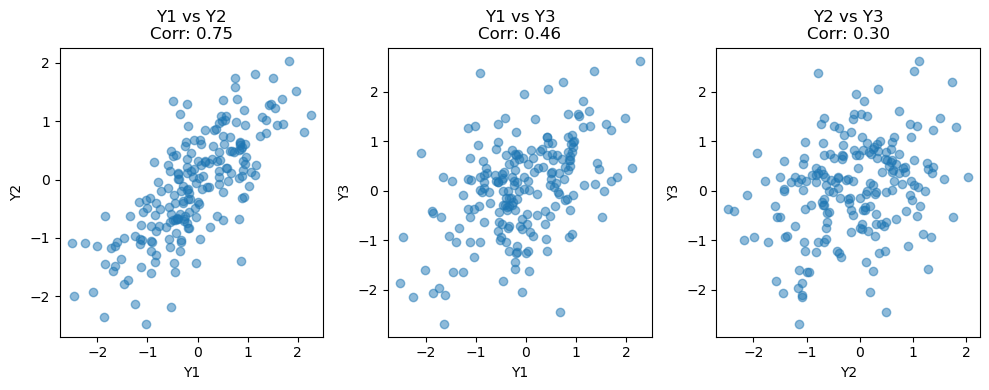

In [6]:
import matplotlib.pyplot as plt

# Scatter plots between Y1, Y2, and Y3
plt.figure(figsize=(10, 4))

# Compute the Pearson correlation coefficients
corr_Y1_Y2 = df['Y1'].corr(df['Y2'])
corr_Y1_Y3 = df['Y1'].corr(df['Y3'])
corr_Y2_Y3 = df['Y2'].corr(df['Y3'])

# Y1 vs Y2
plt.subplot(1, 3, 1)
plt.scatter(df['Y1'], df['Y2'], alpha=0.5)
plt.title(f'Y1 vs Y2\nCorr: {corr_Y1_Y2:.2f}')
plt.xlabel('Y1')
plt.ylabel('Y2')

# Y1 vs Y3
plt.subplot(1, 3, 2)
plt.scatter(df['Y1'], df['Y3'], alpha=0.5)
plt.title(f'Y1 vs Y3\nCorr: {corr_Y1_Y3:.2f}')
plt.xlabel('Y1')
plt.ylabel('Y3')

# Y2 vs Y3
plt.subplot(1, 3, 3)
plt.scatter(df['Y2'], df['Y3'], alpha=0.5)
plt.title(f'Y2 vs Y3\nCorr: {corr_Y2_Y3:.2f}')
plt.xlabel('Y2')
plt.ylabel('Y3')

plt.tight_layout()
plt.show()


### Cross-Correlation Function (CCF)

The cross-correlation function (CCF) measures the temporal relationship between two time series at different lags. Below, we create a cross-correlation matrix plot for all pairs of variables


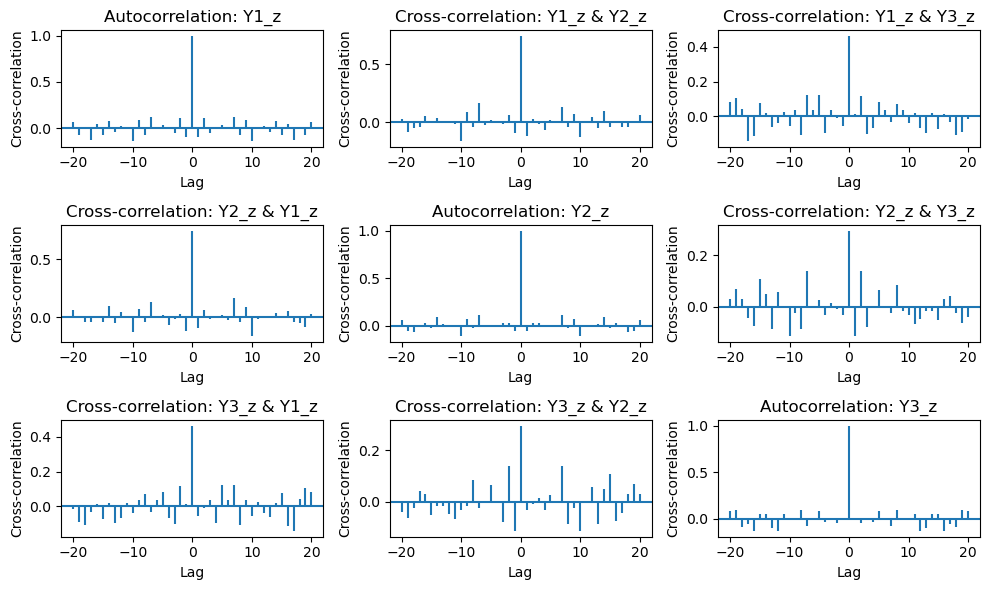

In [8]:
# Standardizing the series (z-scores)
df['Y1_z'] = zscore(df['Y1'])
df['Y2_z'] = zscore(df['Y2'])
df['Y3_z'] = zscore(df['Y3'])

# List of standardized variables
variables = ['Y1_z', 'Y2_z', 'Y3_z']

# Create subplots for cross-correlation matrix
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
max_lags = 20  # Maximum number of lags

# Plot cross-correlations for each pair of variables
for i, var1 in enumerate(variables):
       for j, var2 in enumerate(variables):
              if i == j:
                     # Autocorrelation on the diagonal
                     axes[i, j].xcorr(df[var1], df[var2], maxlags=max_lags)
                     axes[i, j].set_title(f'Autocorrelation: {var1}')
              else:
                     # Cross-correlation for off-diagonal elements
                     axes[i, j].xcorr(df[var1], df[var2], maxlags=max_lags)
                     axes[i, j].set_title(f'Cross-correlation: {var1} & {var2}')

              axes[i, j].set_xlabel('Lag')
              axes[i, j].set_ylabel('Cross-correlation')

plt.tight_layout()
plt.show()
